In [105]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv


# Import Libraries

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

# Data Exploration


In [107]:
df=pd.read_csv(r'/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [108]:
df.shape

(10000, 6)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [110]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [111]:
df.describe().style.background_gradient(cmap='Reds')

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [112]:
df.describe(include = 'object')


,Extracurricular Activities
count,10000
unique,2
top,No
freq,5052


# Data Visualization

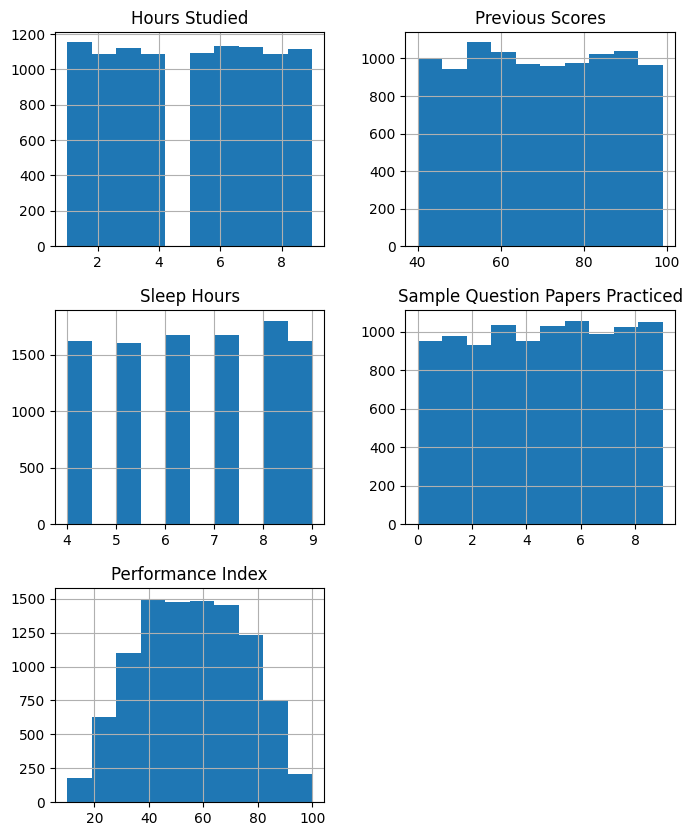

In [113]:
df.hist(figsize=(8,10))
plt.show()

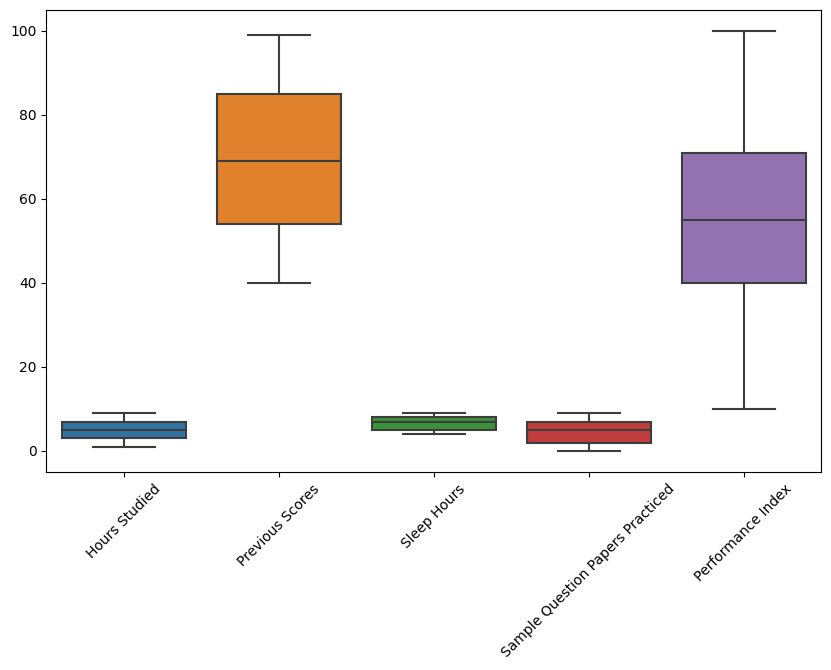

In [114]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)

plt.xticks(rotation=45)
plt.show()

In [115]:
df['Extracurricular Activities'].value_counts().to_frame()

,count
Extracurricular Activities,
No,5052
Yes,4948


<Axes: ylabel='count'>

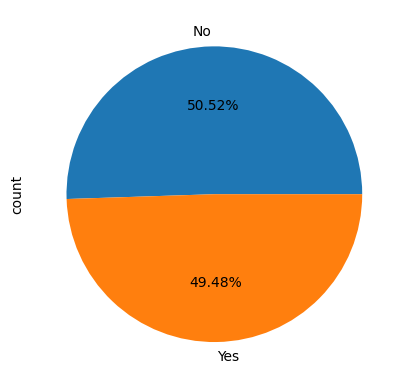

In [116]:
df['Extracurricular Activities'].value_counts().plot(kind='pie',autopct="%.2f%%")

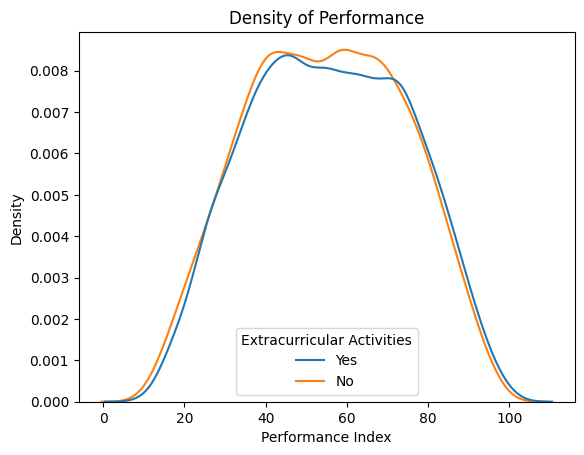

In [117]:
sns.kdeplot(x=df['Performance Index'], hue=df['Extracurricular Activities'])

plt.xlabel('Performance Index') 
plt.ylabel('Density')
plt.title('Density of Performance')
plt.show()

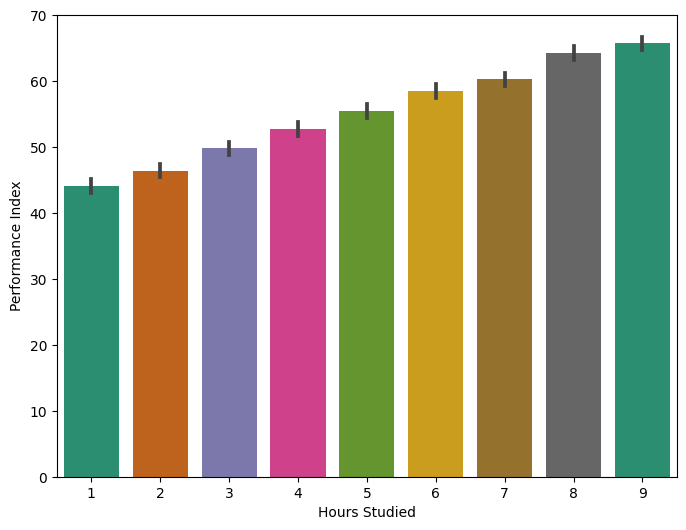

In [118]:
plt.figure(figsize=(8,6))

sns.barplot(x='Hours Studied',y='Performance Index',data=df,palette='Dark2')  
plt.show()

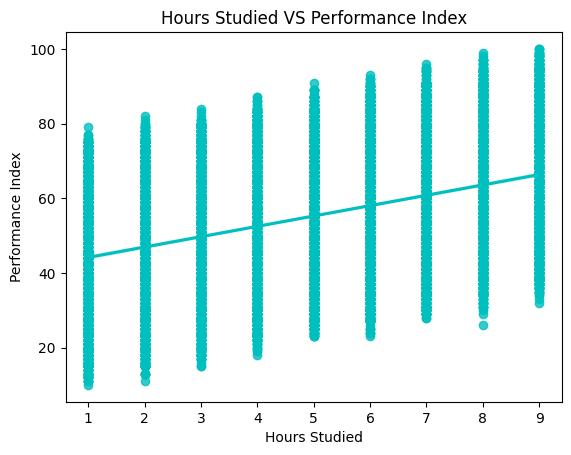

In [119]:
sns.regplot(x='Hours Studied',y='Performance Index',data=df,color='c') ## positive correlation

plt.title('Hours Studied VS Performance Index')
plt.show()

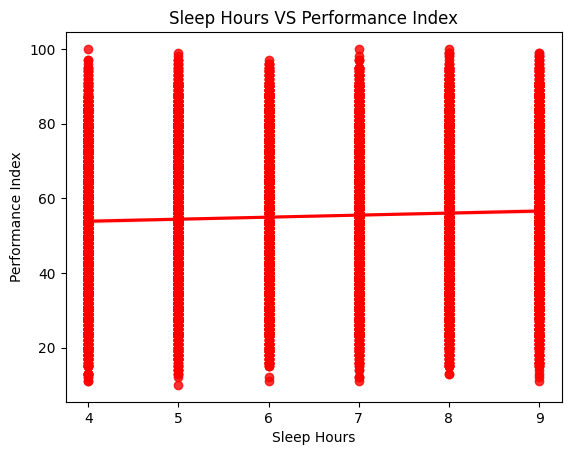

In [120]:
sns.regplot(x='Sleep Hours',y='Performance Index',data=df,color='r')  ## No correlation

plt.title('Sleep Hours VS Performance Index')
plt.show()

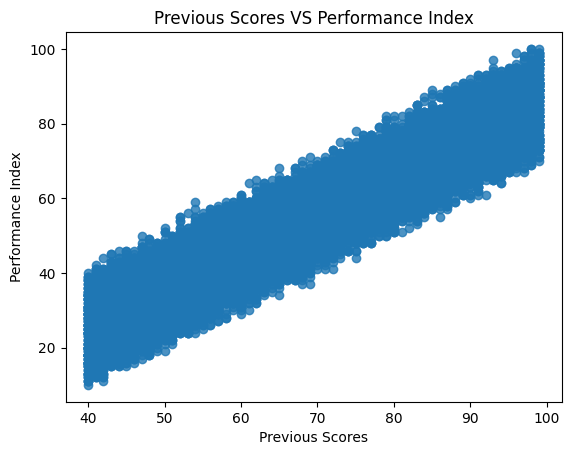

In [121]:
sns.regplot(x='Previous Scores',y='Performance Index',data=df)  

plt.title('Previous Scores VS Performance Index')
plt.show()

In [122]:
dict={'Yes':1,'No':0}
df['Extracurricular Activities']=df['Extracurricular Activities'].map(dict)
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


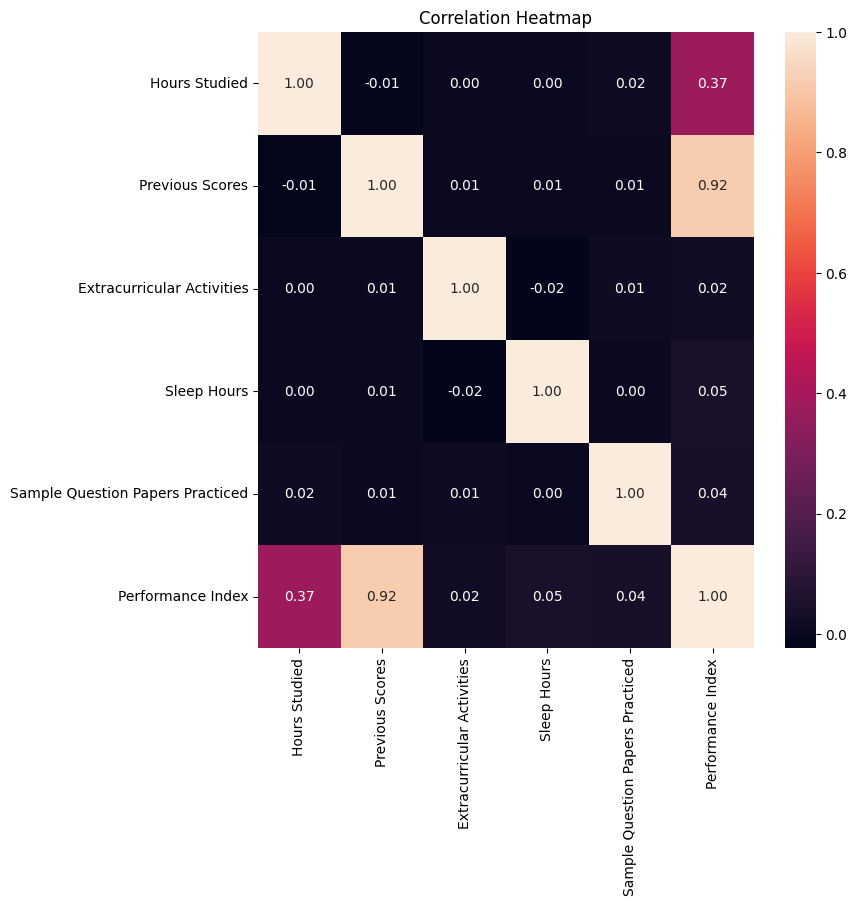

In [123]:
plt.figure(figsize = (8,8))
sns.heatmap(data = df.corr(),annot = True,fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Remove Duplicated

In [124]:
print(f'shape data before drop duplicated {df.shape}')

print(f'number of duplicated row is {df.duplicated().sum()}')


shape data before drop duplicated (10000, 6)
number of duplicated row is 127


In [125]:

df=df.drop_duplicates()
print(f'shape data after drop duplicated {df.shape}')


shape data after drop duplicated (9873, 6)


# Split Data to --> Train-Valid-Test

In [126]:
X=df.drop(columns=['Performance Index']) 
y=df['Performance Index']

In [127]:
##Spliting

X_train_full,X_test,y_train_full,y_test=train_test_split(X,y,test_size=.2,random_state=42)

X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full , test_size=.2,random_state=42)

print(X_train.shape)
print(y_train.shape)
print("===========")
print(X_valid.shape)
print(y_valid.shape)
print("===========")
print(X_test.shape)
print(y_test.shape)

(6318, 5)
(6318,)
(1580, 5)
(1580,)
(1975, 5)
(1975,)


# Scaling

In [128]:
scaler=StandardScaler()
X_train_scale =scaler.fit_transform(X_train)
X_valid_scale =scaler.transform(X_valid)
X_test_scale =scaler.transform(X_test)

# Build Model

### `linear regression`

In [129]:
lin_reg=LinearRegression()
lin_reg.fit(X_train_scale,y_train)

LinearRegression()

In [130]:
# train Evalution
y_train_pred = lin_reg.predict(X_train_scale)

mae = mean_absolute_error(y_train, y_train_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate MSE
mse = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared
r2 = r2_score(y_train, y_train_pred)
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 1.6238329151731794
Mean Squared Error (MSE): 4.163997839347386
Root Mean Squared Error (RMSE): 2.040587621090402
R-squared (R²): 0.9887171949966627


In [131]:
# Test Evalution

y_pred=lin_reg.predict(X_valid_scale)


# Calculate MAE
mae = mean_absolute_error(y_valid, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate MSE
mse = mean_squared_error(y_valid, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared
r2 = r2_score(y_valid, y_pred)
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 1.5933733581836136
Mean Squared Error (MSE): 4.07431011814572
Root Mean Squared Error (RMSE): 2.0184920406446296
R-squared (R²): 0.9887996491514457


### `Random Forest Reg`

In [132]:
rf=RandomForestRegressor(criterion='squared_error',max_depth=6,n_estimators=100,)
rf.fit(X_train_scale,y_train)

RandomForestRegressor(max_depth=6)

In [133]:
# train Evalution
y_train_pred_rf = rf.predict(X_train_scale)

mae = mean_absolute_error(y_train, y_train_pred_rf)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate MSE
mse = mean_squared_error(y_train, y_train_pred_rf)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared
r2 = r2_score(y_train, y_train_pred_rf)
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 1.9960855347378121
Mean Squared Error (MSE): 6.270452267357597
Root Mean Squared Error (RMSE): 2.504087112573681
R-squared (R²): 0.9830095276354854


In [134]:
# Test Evalution

y_pred_rf=rf.predict(X_valid_scale)


# Calculate MAE
mae = mean_absolute_error(y_valid, y_pred_rf)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate MSE
mse = mean_squared_error(y_valid, y_pred_rf)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared
r2 = r2_score(y_valid, y_pred_rf)
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 2.055418863172048
Mean Squared Error (MSE): 6.620959635456864
Root Mean Squared Error (RMSE): 2.5731225457519242
R-squared (R²): 0.9817988644160983


### `XGB Reg`

In [135]:
xgb_reg=XGBRegressor(n_estimators=100,max_depth=6,learning_rate=0.01)
xgb_reg.fit(X_train_scale,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [136]:
# train Evalution
y_train_pred_xgb = rf.predict(X_train_scale)

mae = mean_absolute_error(y_train, y_train_pred_xgb)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate MSE
mse = mean_squared_error(y_train, y_train_pred_xgb)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared
r2 = r2_score(y_train, y_train_pred_xgb)
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 1.9960855347378121
Mean Squared Error (MSE): 6.270452267357597
Root Mean Squared Error (RMSE): 2.504087112573681
R-squared (R²): 0.9830095276354854


In [137]:
# Test Evalution

y_pred_xgb=rf.predict(X_valid_scale)


# Calculate MAE
mae = mean_absolute_error(y_valid, y_pred_xgb)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate MSE
mse = mean_squared_error(y_valid, y_pred_xgb)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared
r2 = r2_score(y_valid, y_pred_xgb)
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 2.055418863172048
Mean Squared Error (MSE): 6.620959635456864
Root Mean Squared Error (RMSE): 2.5731225457519242
R-squared (R²): 0.9817988644160983


# Model Generaliz

In [138]:
y_prediction=lin_reg.predict(X_test_scale)

# Calculate MAE
mae = mean_absolute_error(y_test, y_prediction)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate MSE
mse = mean_squared_error(y_test, y_prediction)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared
r2 = r2_score(y_test, y_prediction)
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 1.6463437402078172
Mean Squared Error (MSE): 4.302078696815995
Root Mean Squared Error (RMSE): 2.074145293082429
R-squared (R²): 0.9884403912880273
